<a href="https://colab.research.google.com/github/anncam/capstone/blob/main/Muse_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#giving permission to access drive for data 
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
pip install muse-maskgit-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.5/754.5 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.7 MB/s eta 0:00:00


In [ ]:
import torch 
from muse_maskgit_pytorch import VQGanVAE, VQGanVAETrainer

In [ ]:
import glob
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from torch.utils.data import DataLoader
from torchvision import transforms

In [ ]:
#checking file path
myfile="/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/aardvark/aardvark_01b.jpg"
os.path.isfile(myfile) #check if Python can find my file 


True

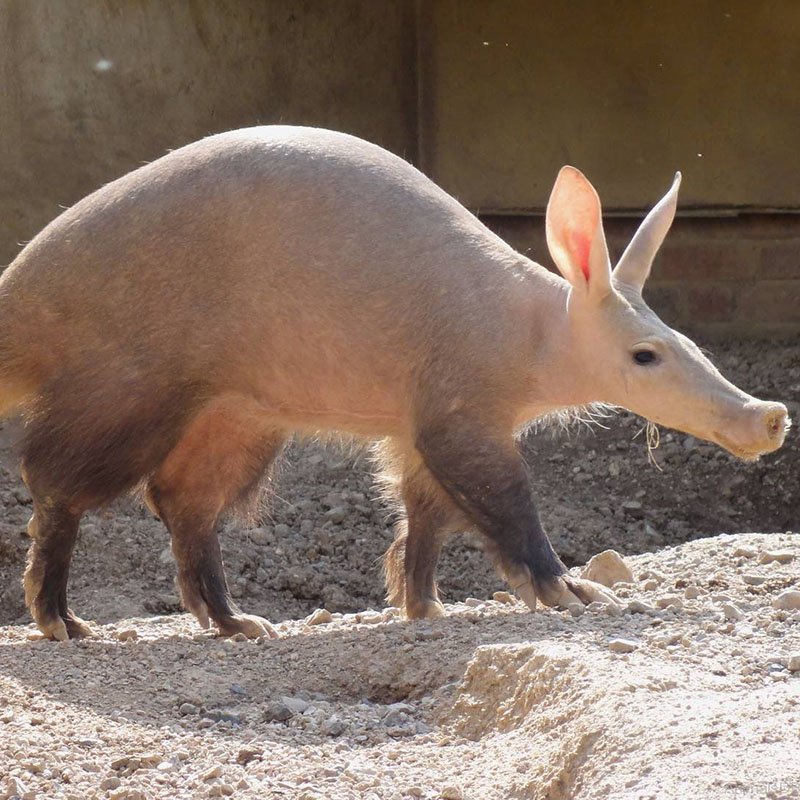

In [ ]:
Image.open(myfile)

## for when i want to pull random images from all files

In [ ]:
rand_images=np.random.choice(glob.glob('/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/**/*.jpg'),100) #selecting a random number of images 
type(rand_images)

['/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/gurney/gurney_19s.jpg'
 '/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/toad/toad_11s.jpg'
 '/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/parachute/parachute_03s.jpg'
 '/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/yarn/yarn_12s.jpg'
 '/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/blind/blind_22s.jpg']


In [ ]:
print(rand_images[0:5])

['/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/gurney/gurney_19s.jpg'
 '/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/toad/toad_11s.jpg'
 '/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/parachute/parachute_03s.jpg'
 '/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/yarn/yarn_12s.jpg'
 '/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/blind/blind_22s.jpg']


In [ ]:
#reading jpgs from path
images=[]
for path in rand_images:
    image = Image.open(path)
    images.append(image)

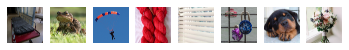

In [ ]:
#view first few images
# assume `images` is the list of loaded images
num_images_to_show = 8

# plot the first 5 images
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()

In [ ]:
#check image size
for image in images:
    print("Image size: ", image.size)


In [ ]:
#resize images to 128 per suggestion in Muse github
new_size = (128, 128)
resized_images = []

# iterate through the images and resize each one
for image in images:
    image.thumbnail(new_size) #thumbnail keeps aspect ratio the same 
    resized_images.append(image)

In [ ]:
#HAVENT TRIED THIS YET
#to change size and convert to tensor; need to normalize?
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

dataset = ImageDataset('path/to/your/images', transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
#check image size
for image in resized_images:
    print("Image size: ", image.size)

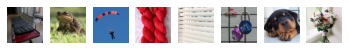

In [ ]:
#printing again to check 
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(resized_images[i])
    plt.axis('off')

plt.show()

## training VQGan

background:

*   VQGAN tokenizer based off of VQGAN (vector quantization algorithm) neural net
*   **tokenization**: breaking text down into smaller pieces (words of a sentence, letters of a word, sentences of a paragraph, etc) 
*   VQGAN tokenizes IMAGES instead of text; compresses images to be fed into a model
    *   breaks up continuous image values into finite number of discrete values or **CODEBOOK** vectors
    * does this by dividing all image values into a grid of cells then assign each cell to a codebook vector
    * then each image pixel is assignd to the codebook corresponding to where it falls in the image
    
* then the tokenized sequence of codebook vectors goes into the actual VQGAN model

* model uses convolution and attention based architecture to make high quality images from the tokenized input





In [ ]:

vae = VQGanVAE(
    dim = 256,
    vq_codebook_size = 512
)

#random sample of all training image files 
#train_images=np.random.choice(glob.glob('/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/**/*.jpg'),1000)

# train on folder of images, as many images as possible

trainer = VQGanVAETrainer(
    vae = vae,
    image_size = 128,             # you may want to start with small images, and then curriculum learn to larger ones, but because the vae is all convolution, it should generalize to 512 (as in paper) without training on it
    folder = resized_images,
    batch_size = 4,
    grad_accum_every = 8,
    num_train_steps = 10 #changed from 50000 for practicing 
).cuda()

trainer.train()

OSError: ignored

# base transformer and low res section

In [ ]:
import torch
from muse_maskgit_pytorch import VQGanVAE, MaskGit, MaskGitTransformer

# first instantiate your vae

vae = VQGanVAE(
    dim = 256,
    vq_codebook_size = 512
).cuda()

vae.load('./results/vae.0.pt') # you will want to load the exponentially moving averaged VAE

# then you plug the vae and transformer into your MaskGit as so

# (1) create your transformer / attention network

transformer = MaskGitTransformer(
    num_tokens = 512,         # must be same as codebook size above
    seq_len = 256,            # must be equivalent to fmap_size ** 2 in vae
    dim = 512,                # model dimension
    depth = 8,                # depth
    dim_head = 64,            # attention head dimension
    heads = 8,                # attention heads,
    ff_mult = 4,              # feedforward expansion factor
    t5_name = 't5-small',     # name of your T5
)

# (2) pass your trained VAE and the base transformer to MaskGit

base_maskgit = MaskGit(
    vae = vae,                 # vqgan vae
    transformer = transformer, # transformer
    image_size = 256,          # image size
    cond_drop_prob = 0.25,     # conditional dropout, for classifier free guidance
).cuda()

# ready your training text and images

#matching pictures to what they are?
texts = [
    'an aardvark ',
    'an aardvark ',
    'an aardvark ',
    'an aardvark '
]

aard_path='/content/gdrive/MyDrive/Multisensory Complexity Metric/Visual Stimuli/Natural (THINGS)/images/aardvark/'

#grab images convert to tensor 
#ims_list=[]
#files_list=os.listdir(aard_path)[0:4]
#for file in files_list:
  #im=Image.open(aard_path+file)
  #im=im.resize((256,256))
  #ims_list.append(np.array(im).astype(int).T)

#images=torch.tensor(ims_list).cuda()

#random noise?
images = torch.randn(4, 3, 256, 256).cuda() #4 text inputs, 

# feed it into your maskgit instance, with return_loss set to True

#(put loss into a for loop and run it more)
for i in range(50):
  loss = base_maskgit(
      images,
      texts = texts
  )

  loss.backward()

# do this for a long time on much data
# then...

#where it'll generate images based on the text below
images = base_maskgit.generate(texts = [
    'an aardvark on grass',
    'an aardvark in the desert',
    'aardvark sniffing the ground'
], cond_scale = 3.) # conditioning scale for classifier free guidance (how much to listen to prompt)

images.shape # (3, 3, 256, 256)

OutOfMemoryError: ignored

In [ ]:
images[0]
#files_list

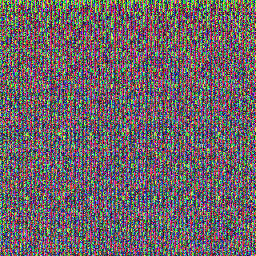

In [ ]:
import matplotlib.pyplot as plt

img=Image.fromarray(images.cpu()[0].numpy().T, "RGB")

img.size

img

# super res section

In [ ]:
import torch
torch.cuda.empty_cache()

#free_gpu_cache()

In [ ]:
import torch
import torch.nn.functional as F
from muse_maskgit_pytorch import VQGanVAE, MaskGit, MaskGitTransformer

# first instantiate your ViT VQGan VAE
# a VQGan VAE made of transformers

vae = VQGanVAE(
    dim = 256,
    vq_codebook_size = 512
).cuda()

vae.load('./results/vae.0.pt') # you will want to load the exponentially moving averaged VAE

# then you plug the VqGan VAE into your MaskGit as so

# (1) create your transformer / attention network

transformer = MaskGitTransformer(
    num_tokens = 512,         # must be same as codebook size above
    seq_len = 1024,           # must be equivalent to fmap_size ** 2 in vae
    dim = 512,                # model dimension
    depth = 2,                # depth
    dim_head = 64,            # attention head dimension
    heads = 8,                # attention heads,
    ff_mult = 4,              # feedforward expansion factor
    t5_name = 't5-small',     # name of your T5
)

# (2) pass your trained VAE and the base transformer to MaskGit

superres_maskgit = MaskGit(
    vae = vae,
    transformer = transformer,
    cond_drop_prob = 0.25,
    image_size = 512,                     # larger image size
    cond_image_size = 256,                # conditioning image size <- this must be set
).cuda()

# ready your training text and images
texts = [
    'an aardvark ',
    'an aardvark ',
    'an aardvark '#,
    #'an aardvark '
]

images = torch.randn(4, 3, 512, 512).cuda()

# feed it into your maskgit instance, with return_loss set to True

for i in range(50):
  loss = superres_maskgit(
      images,
      texts = texts
      )
  
  loss.backward()

# do this for a long time on much data
# then...

images = superres_maskgit.generate(
    texts = [
        'an aardvark on grass',
        'an aardvark in the desert',
        'aardvark sniffing the ground'
    ],
    cond_images = F.interpolate(images, 256),  # conditioning images must be passed in for generating from superres
    cond_scale = 3.
)

images.shape # (4, 3, 512, 512)

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

img=Image.fromarray(images.cpu()[0].numpy().T, "RGB")

img.size

img